**Examen Diagnóstico**

Curso: Estadística Aplicada,  2018

Alumno: Emiliano López

**Ejercicio 2**

In [10]:
# Carga de datos
litiasis = read.delim("~/EstadisticaAplicada/examen1/litiasis.txt")
edad_grupo1 = litiasis$edad[litiasis$sexo==1]
edad_grupo2 = litiasis$edad[litiasis$sexo==2]

# Cantidad de datos de cada grupo y medias
n1 = length(edad_grupo1)
n2 = length(edad_grupo2)
media_grupo1 = mean(edad_grupo1) 
media_grupo2 = mean(edad_grupo2) 

**a)** Realice un resumen numérico y gráfico que le permita responder (exploratoriamente) a la pregunta
de interés. ¿Existen diferencias entre la edad media de varones y mujeres que padecen de litiasis?
Dé sus conclusiones exploratorias.

Vemos un resumen numérico usando ``favstats`` de la biblioteca ``mosaic``, donde nos muestra la cantidad de elementos de cada grupo, mínimo y máximo, media, desviación estándar, primer y tercer quantil y mediana.

In [3]:
library(mosaic)
favstats(litiasis$edad~litiasis$sexo)

litiasis$sexo,min,Q1,median,Q3,max,mean,sd,n,missing
1,28,37,44,52.0,65,44.02941,10.57580,34,0
2,15,24,37,52.5,66,38.34848,15.55288,66,0


Veamos inicialmente un gráfico de barras con los valores ordenados para comprender mejor los datos

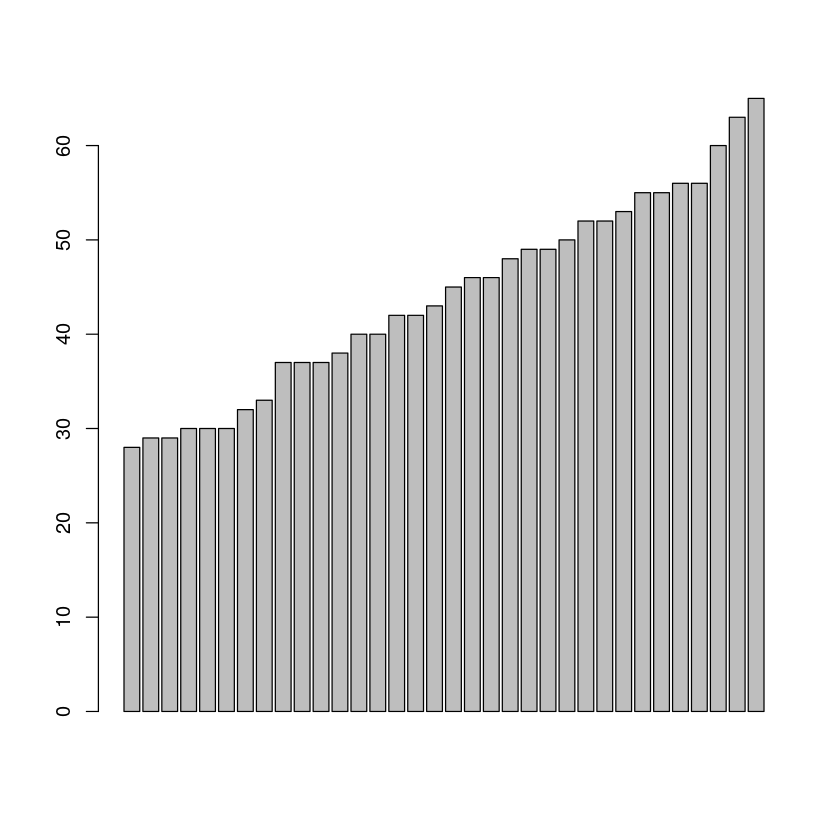

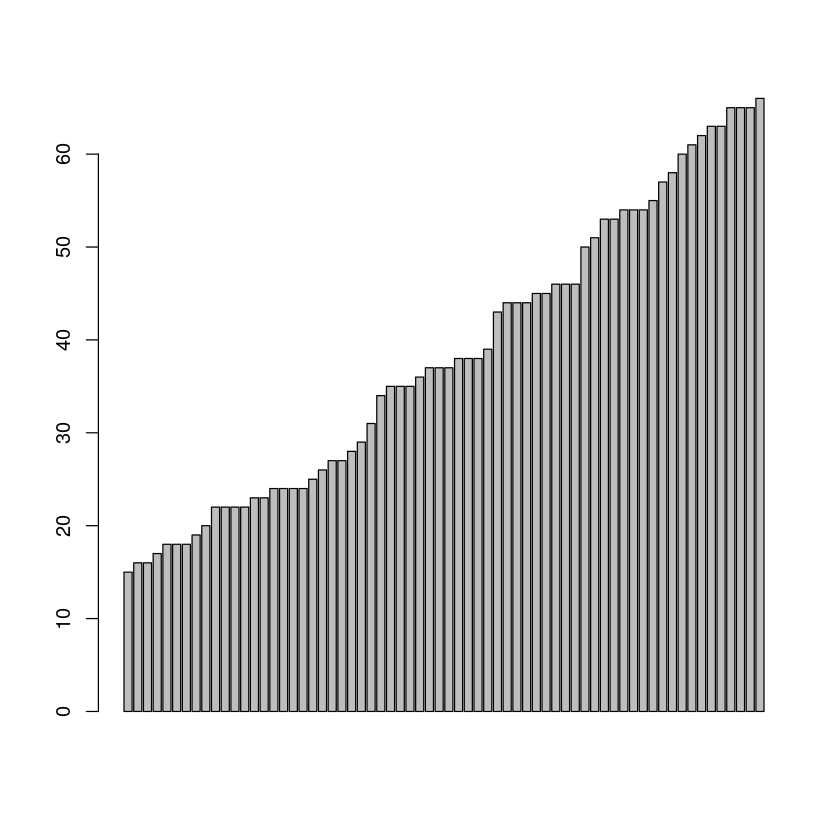

In [4]:
barplot(sort(edad_grupo1))
barplot(sort(edad_grupo2))

**Graficamos el boxplot**

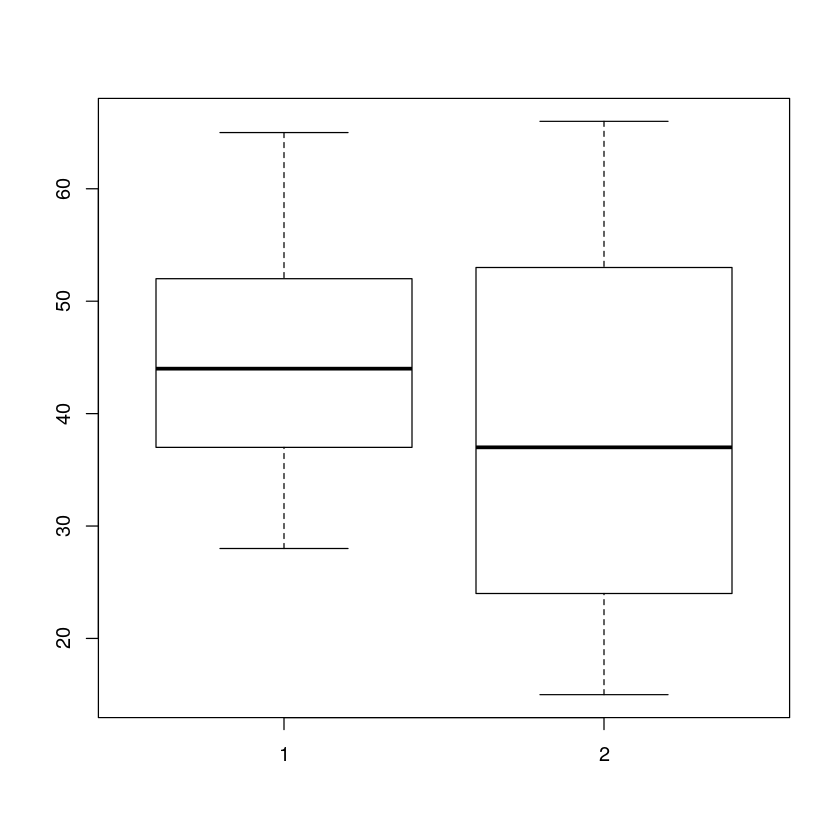

In [10]:
boxplot(litiasis$edad~litiasis$sexo)

**Veamos la distribución de los datos con un histograma**

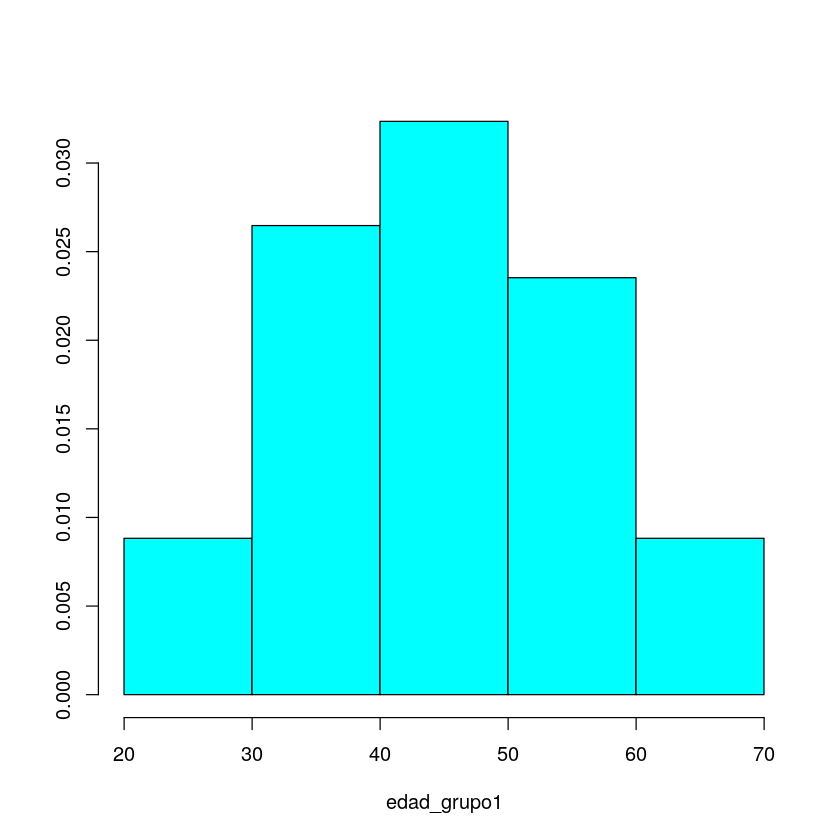

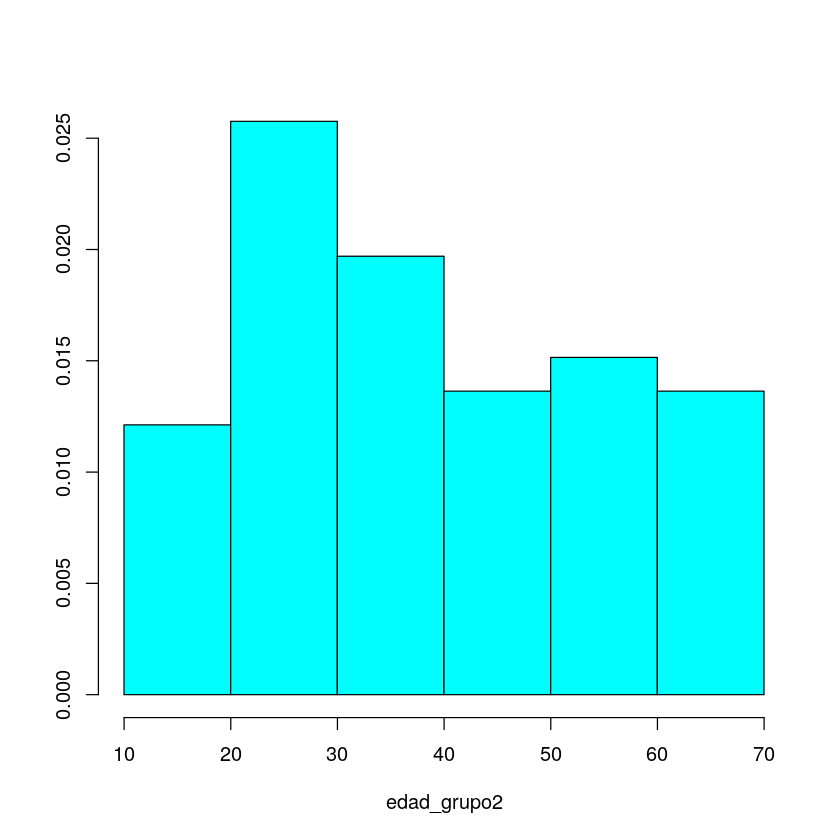

In [6]:
library(MASS)
truehist(edad_grupo1)
truehist(edad_grupo2)

**Corroboramos si la distribución es normal viendo el gráfico qqnorm**

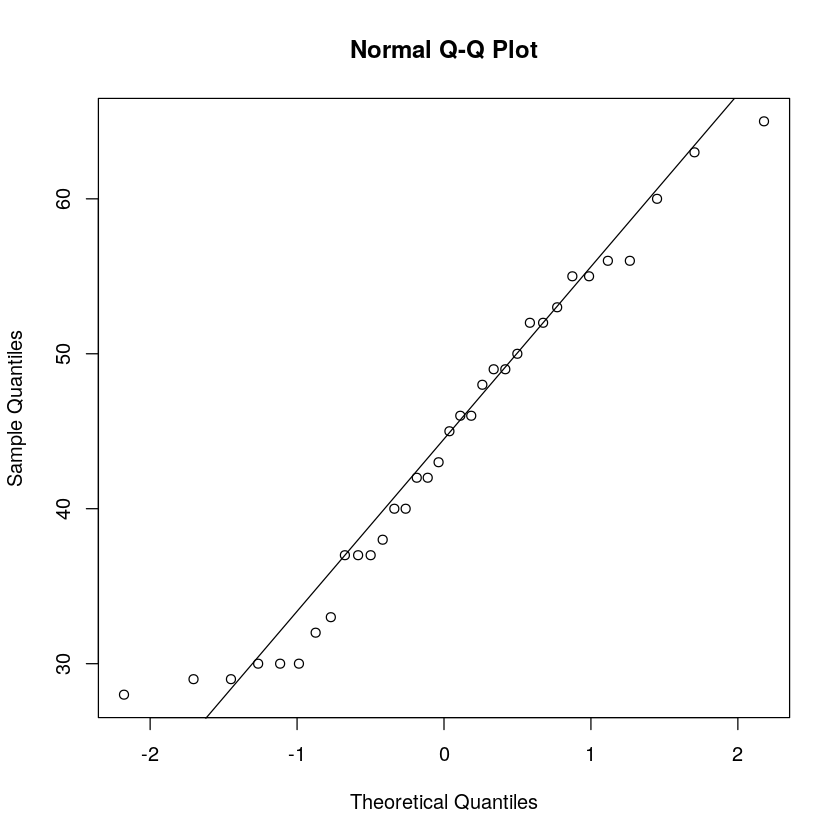

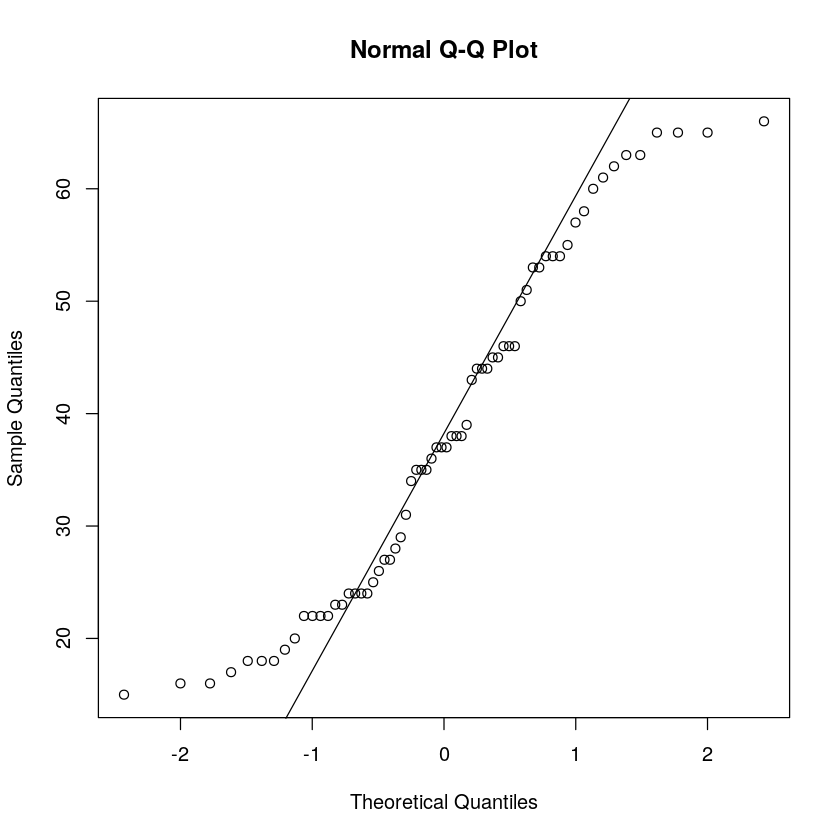

In [15]:
qqnorm(edad_grupo1)
qqline(edad_grupo1)

qqnorm(edad_grupo2)
qqline(edad_grupo2)

**b)** ¿Qué parámetro poblacional debe estudiar para contestar la pregunta de interés? Explique claramente cada sı́mbolo que usa y su significado en el contexto del problema.

El parámetro poblacional es la diferencia de las medias poblacionales ($\mu_1$ y $\mu_2$)

- H0: $\mu_1 = \mu_2 \Rightarrow \mu_1 - \mu_2 = 0$
- H1: $\mu_1 \neq \mu_2  \Rightarrow \mu_1 - \mu_2 > 0$



**c)** Proponga un estimador puntual para el parámetro de interés e informe el valor que se obtiene con la muestra.

Como desconocemos las varianzas de la población y como vimos en el boxplot previo, las varianzas muestrales son diferentes debemos utilizar un estimador

$$T = {{X_n - Y_m} \over \sqrt{ {{S^2_x} \over {n}} + {{S^2_y} \over {m}} }}$$

Calculando esto en ``R``, obtenemos: 2.15417532298295

**OJO, EL ESTIMADOR ES UNA APROXIMACIÓN GLOBAL, GENERAL, NO ES LO MISMO QUE EL ESTADÍSTICO, SI BIEN PUEDE SER LO MISMO, EL ESTIMADOR SUELE DARRTE EL VALOR VERDADERO, SE MANTIENEN LAS UNIDADES, ENTONCES NOS SIRVE COMO PARA ENTENDER QUÉ CARAJO ESTAMOS HACIENDO**


In [23]:
T = (media_grupo1 - media_grupo2) / sqrt(var(edad_grupo1)/n1 + var(edad_grupo2)/n2)
T


[1] 2.154175

In [24]:
# vemos el pvalor que nos arroja var.test para contrastar
var.test(litiasis$edad~litiasis$sexo)


	F test to compare two variances

data:  litiasis$edad by litiasis$sexo
F = 0.46239, num df = 33, denom df = 65, p-value = 0.01732
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.2611878 0.8686664
sample estimates:
ratio of variances 
         0.4623864 


**d)** Construya una distribución bootstrap (utilice 5000 remuestreos) para el estimador propuesto en el item anterior. Describa la forma, el centro y el rango de la distribución. Calcule e informe el error estándar.

**EN ESTO TAMBIEN PIFIAMOS PORQUE HABIA QUE USAR EL ESTIMADOR, NO EL ESTADISTICO. O SEA QUE ERA MAS FACIL, SOLAMENTE HABIA QUE HACER LA DIFERENCIA. NOS DA UN VALOR QUE NO SE PUEDE TRADUCIR EN EDAD**

**HAY QUE TENER LAS COSAS EN UNA ESCALA DE AÑOS, POR ESO MAS O MENOS TE DAS CUENTA QUE ESTAS PIFIANDO PORQUE SINO NO TE DICE MUCHO**

**ES IMPORTANTIIIIIIIIIIIIIISIMO QUE SEA LA MISMA ESCALA**

**PORQUE NO PODRIAMOS VER SI EL 0 ESTA DENTRO DE TU INTERVALO PORQUE ESTAS LABURANDO CON OTRA UNIDAD/ESCALA, ENTONCES ES MAS DIFICIL DE VER**

[1] "Error estándar: "
[1] 1.02777


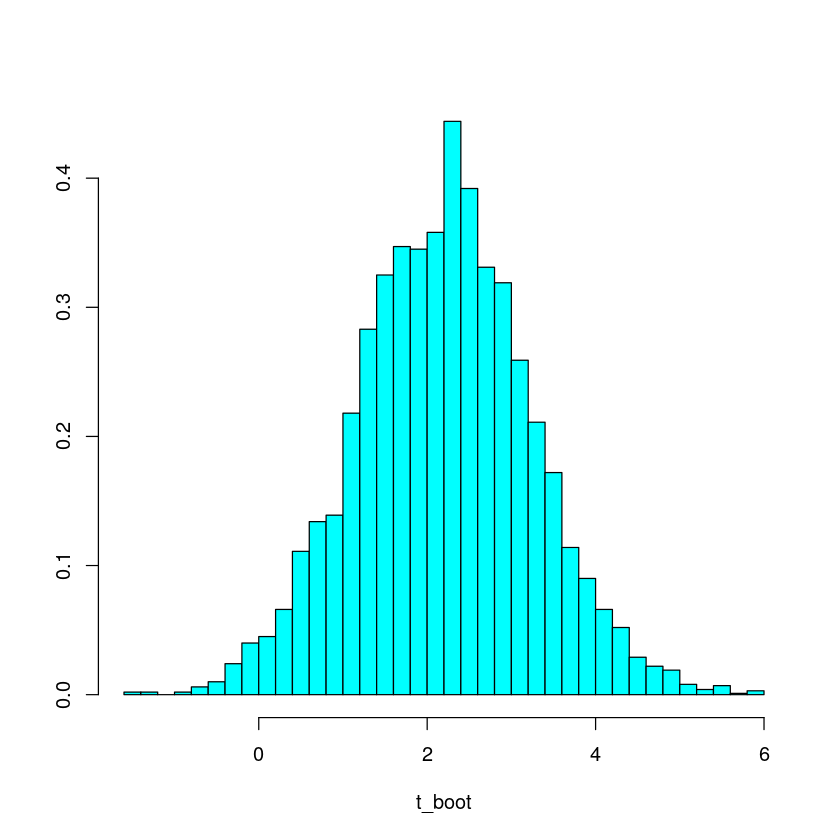

In [19]:
N = 5000
t_boot = numeric(N)

for (i in 1:N){
    bootG1 = sample(edad_grupo1, n1, replace=TRUE)
    bootG2 = sample(edad_grupo2, n2, replace=TRUE)
    # O SEA QUE ACA DEBERIA SACAR LO QUE ESTA EN EL DENOMINADOR NOMAS!
    t_boot[i] = (mean(bootG1) - mean(bootG2)) / sqrt(var(bootG1)/n1 + var(bootG2)/n2)
}
truehist(t_boot)
error_std = sd(t_boot)
print("Error estándar: ")
print(error_std)

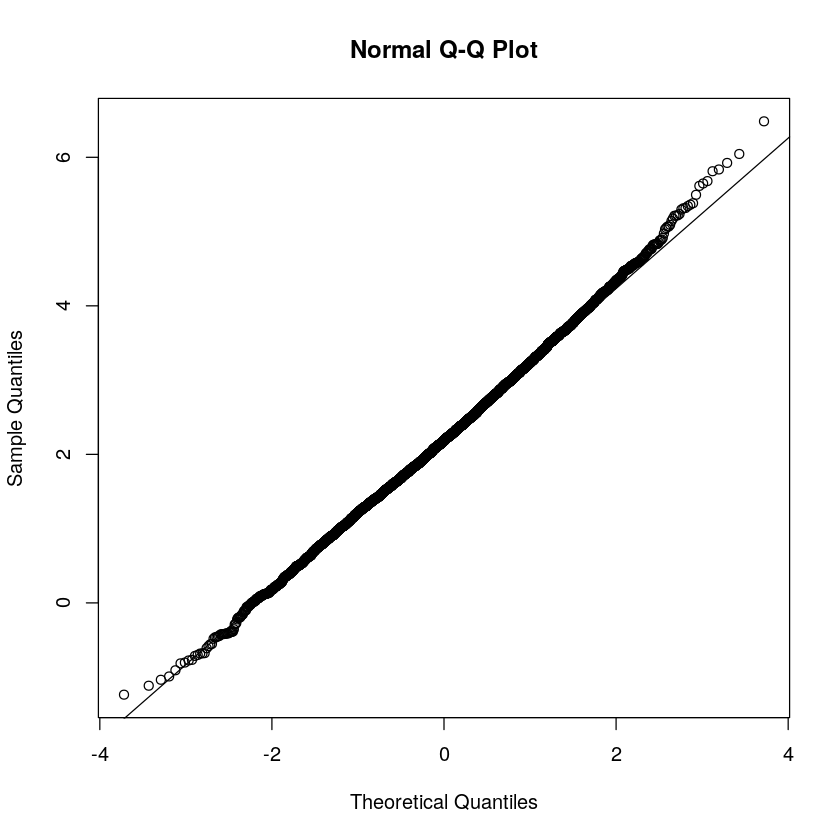

In [48]:
qqnorm(t_boot)
qqline(t_boot)

**e)** Utilizando la distribución bootstrap construida en el item anterior, construya un intervalo del 95 % de confianza para el parámetro de interés. Reporte el intervalo obtenido y el método que utilizó para calcularlo.

In [20]:
alpha = 0.05
#zalpha = qnorm(1-alpha/2)
zalpha = qt(1-alpha/2, n1+n2-2)

# Intervalos de confianza
IC_sup = T + zalpha*error_std
IC_inf = T - zalpha*error_std
IC_sup
IC_inf

[1] 4.193751

[1] 0.1145998

**f)** A partir del intervalo construı́do, responda la pregunta de interés.

Vemos que el estadístico de prueba se encuentra dentro del intervalo por lo que no tenemos evidencia suficiente para rechazar la hipótesis nula (H0). 

Si hacemos el ``t.test`` concluímos que debemos **rechazar la H0** ya que: $pvalor < \alpha$

In [28]:
h = t.test(litiasis$edad~litiasis$sexo, alternative = "two.sided")
# calculamos el pvalor manualmente para corroborar
pvalor = 2*(1- pt(T, n1+n2-2))
pvalor
h$p.value

[1] 0.03367814

[1] 0.03388391

**g)** Realice un análisis estadı́stico que le permita decidir si las varianzas de ambas poblaciones pueden
suponerse iguales o diferentes. Dé su conclusión justificando correctamente.

Podemos hacer el test de las varianzas con ``var.test``, en este caso se utiliza el estadístico que consiste en el cociente de los estumadores muestrales, es decir 

$$\theta = {{S_x^2} \over {S_y^2}} = {{{S_x^2} \over {\sigma_y^2}} \over {{S_x^2} \over {\sigma_y^2}}} = {{{\chi^2(n-1)}\over {n-1}} \over {{\chi^2(m-1)}\over{m-1}}} \approx F(n-1, m-1)$$

In [80]:
var.test(litiasis$edad~litiasis$sexo)


	F test to compare two variances

data:  litiasis$edad by litiasis$sexo
F = 0.46239, num df = 33, denom df = 65, p-value = 0.01732
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.2611878 0.8686664
sample estimates:
ratio of variances 
         0.4623864 
